# KDD Methodology Steps

**1. Data Selection**

In this phase, we'll:

1. Load the dataset.
2. Provide a basic overview by displaying the first few rows.
3. Check the data types of each column.
4. Identify any null values.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon_popular_books_dataset.csv')

# Display basic information and the first few rows
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   asin                  307 non-null    object 
 1   ISBN10                307 non-null    object 
 2   answered_questions    307 non-null    int64  
 3   availability          295 non-null    object 
 4   brand                 307 non-null    object 
 5   currency              307 non-null    object 
 6   date_first_available  0 non-null      float64
 7   delivery              307 non-null    object 
 8   department            0 non-null      float64
 9   description           127 non-null    object 
 10  discount              254 non-null    float64
 11  domain                307 non-null    object 
 12  features              307 non-null    object 
 13  final_price           297 non-null    float64
 14  format                301 non-null    object 
 15  image_url             3

(None,
          asin         ISBN10  answered_questions availability  \
 0  0007350813     0007350813                   0    In Stock.   
 1  0007513763  9780007513765                   0    In Stock.   
 2  0008183988     0008183988                   0          NaN   
 3  0008305838     0008305838                   0    In Stock.   
 4  0008375526     0008375526                   0    In Stock.   
 
               brand currency  date_first_available  \
 0      Emily Brontë      USD                   NaN   
 1      Drew Daywalt      USD                   NaN   
 2  Bernard Cornwell      USD                   NaN   
 3    David Walliams      USD                   NaN   
 4   Caroline Hirons      USD                   NaN   
 
                                             delivery  department description  \
 0  ["FREE delivery Tuesday, December 28 if you sp...         NaN         NaN   
 1  ["FREE delivery Tuesday, December 28 if you sp...         NaN         NaN   
 2  ["FREE delivery 

**2. Data Preprocessing**

In this phase, we'll:

1. Handle missing values.
2. Identify outliers.
3. Explore basic statistics.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Sort the columns by the percentage of missing values in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

missing_percentage_sorted

model_number            100.000000
department              100.000000
number_of_sellers       100.000000
image                   100.000000
video                   100.000000
upc                     100.000000
manufacturer            100.000000
colors                  100.000000
date_first_available    100.000000
description              58.631922
plus_content             58.306189
buybox_seller            20.846906
initial_price            17.589577
discount                 17.263844
availability              3.908795
final_price               3.257329
seller_id                 2.605863
product_dimensions        2.280130
format                    1.954397
item_weight               1.302932
root_bs_rank              0.977199
best_sellers_rank         0.651466
title                     0.325733
timestamp                 0.325733
url                       0.325733
seller_name               0.325733
reviews_count             0.325733
rating                    0.325733
video_count         

**Handling Missing Values:**

1. Drop Columns with >90% Missing Values
2. Columns with Descriptive Information (e.g., description)
3. Numerical Columns with Missing Values
4. Categorical Columns with Missing Values

In [ ]:
# Drop columns with more than 90% missing values
data_cleaned = data.drop(columns=missing_percentage_sorted[missing_percentage_sorted > 90].index.tolist())

# Fill 'description' column with 'Not Available'
data_cleaned['description'].fillna('Not Available', inplace=True)

# Fill numerical columns with their median
for column in data_cleaned.select_dtypes(include=['float64', 'int64']):
    data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)

# Fill categorical columns with their mode
for column in data_cleaned.select_dtypes(include=['object']):
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)

# Check remaining missing values
remaining_missing = data_cleaned.isnull().sum()

remaining_missing[remaining_missing > 0]


Series([], dtype: int64)

Next, we'll identify potential outliers in the dataset. We can use boxplots to visualize the distribution of numerical columns and identify outliers. For the sake of brevity, we'll visualize a subset of the numerical columns. Let's proceed with that.

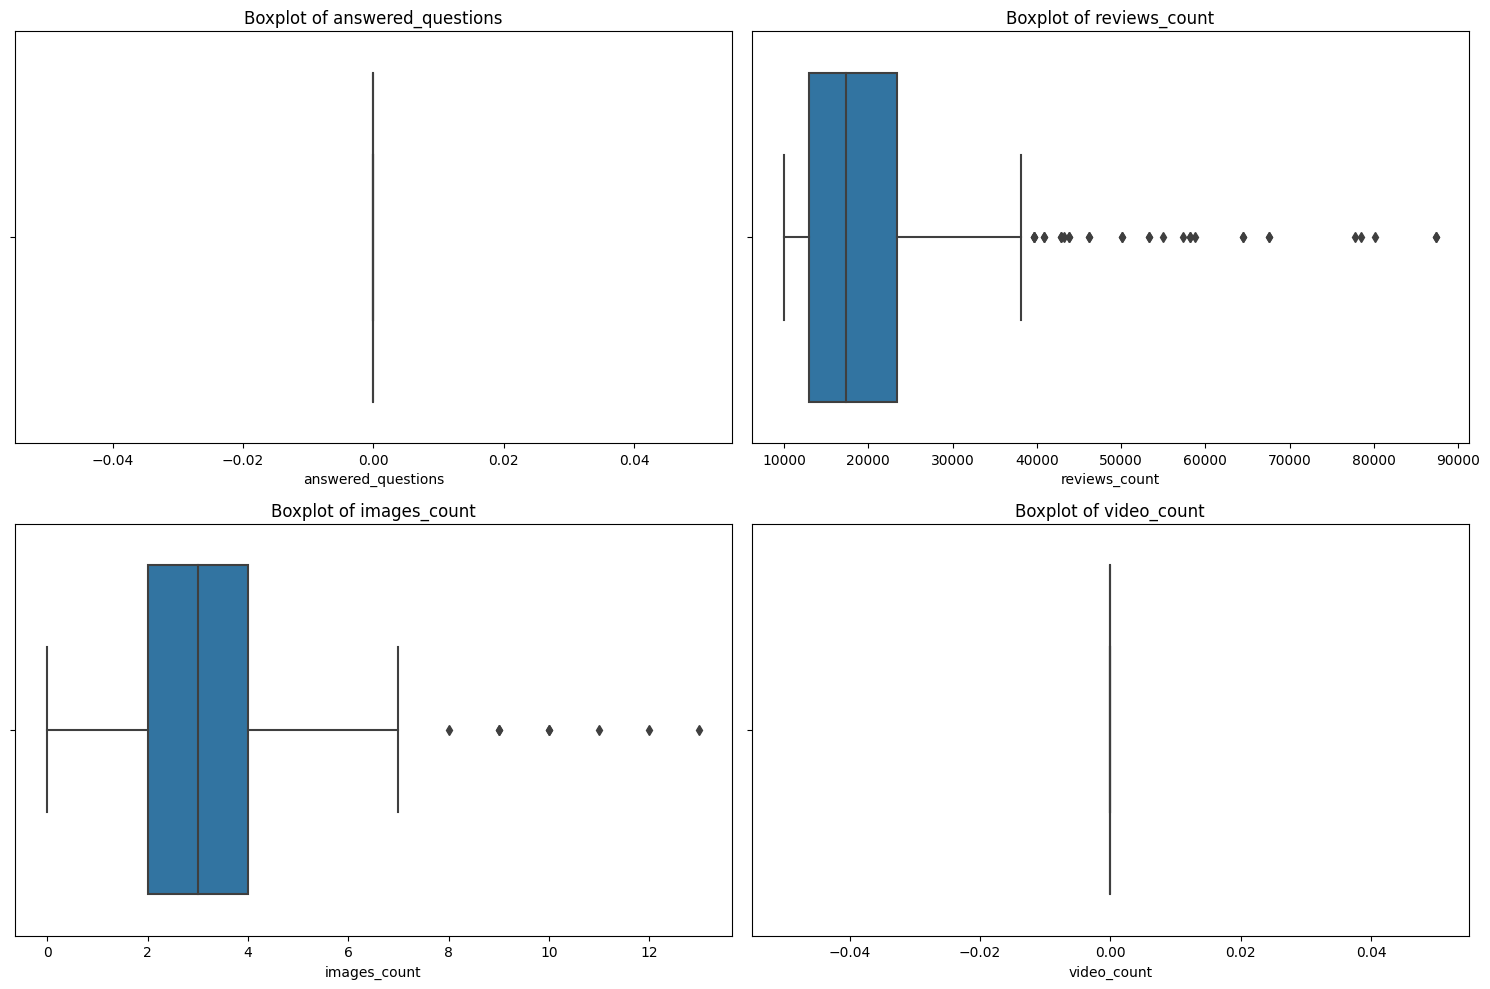

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numerical columns for visualization
subset_columns = ['answered_questions', 'reviews_count', 'images_count', 'video_count']

# Plot boxplots for the selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(subset_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# Basic statistics for numerical columns
numerical_stats = data_cleaned.describe()

numerical_stats

,answered_questions,discount,final_price,images_count,initial_price,plus_content,reviews_count,root_bs_rank,video_count
count,307.0,307.000000,307.000000,307.000000,307.000000,307.0,307.000000,307.000000,307.0
mean,0.0,7.569919,14.155342,3.078176,20.969609,1.0,21415.162866,27746.242671,0.0
std,0.0,5.795763,7.962045,1.943755,10.936183,0.0,13688.368635,80067.167117,0.0
min,0.0,0.700000,2.980000,0.000000,3.990000,1.0,10041.000000,20.000000,0.0
25%,0.0,4.425000,9.105000,2.000000,16.990000,1.0,12943.000000,1717.500000,0.0
50%,0.0,6.505000,12.590000,3.000000,18.000000,1.0,17398.000000,6065.500000,0.0
75%,0.0,8.780000,15.990000,4.000000,24.990000,1.0,23450.500000,21028.000000,0.0
max,0.0,66.010000,56.490000,13.000000,120.000000,1.0,87406.000000,917121.000000,0.0


**3. Data Transformation**

1. Feature engineering (if needed).
2. Standardization/Normalization (if required for any specific analyses or modeling).

In [ ]:
# Convert 'timestamp' to datetime format
data_cleaned['timestamp'] = pd.to_datetime(data_cleaned['timestamp'])

# Extract year, month, day, and day_of_week
data_cleaned['year'] = data_cleaned['timestamp'].dt.year
data_cleaned['month'] = data_cleaned['timestamp'].dt.month
data_cleaned['day'] = data_cleaned['timestamp'].dt.day
data_cleaned['day_of_week'] = data_cleaned['timestamp'].dt.dayofweek

# Sample the dataset to see the new columns
data_cleaned[['timestamp', 'year', 'month', 'day', 'day_of_week']].head()


,timestamp,year,month,day,day_of_week
0,2021-12-21 23:35:40.084000+00:00,2021,12,21,1
1,2021-12-21 23:23:16.450000+00:00,2021,12,21,1
2,2021-12-21 23:23:19.996000+00:00,2021,12,21,1
3,2021-12-21 23:23:17.540000+00:00,2021,12,21,1
4,2021-12-21 23:35:39.675000+00:00,2021,12,21,1


**4. Data Mining**

**Univariate Analysis**

We'll visualize the distribution of some key columns to understand their individual characteristics. We'll focus on:

**answered_questions:** Distribution of the number of answered questions for the books.
**reviews_count:** Distribution of the number of reviews for the books.
**rating:** Distribution of the ratings of the books.
**month:** Distribution of the data collection month.

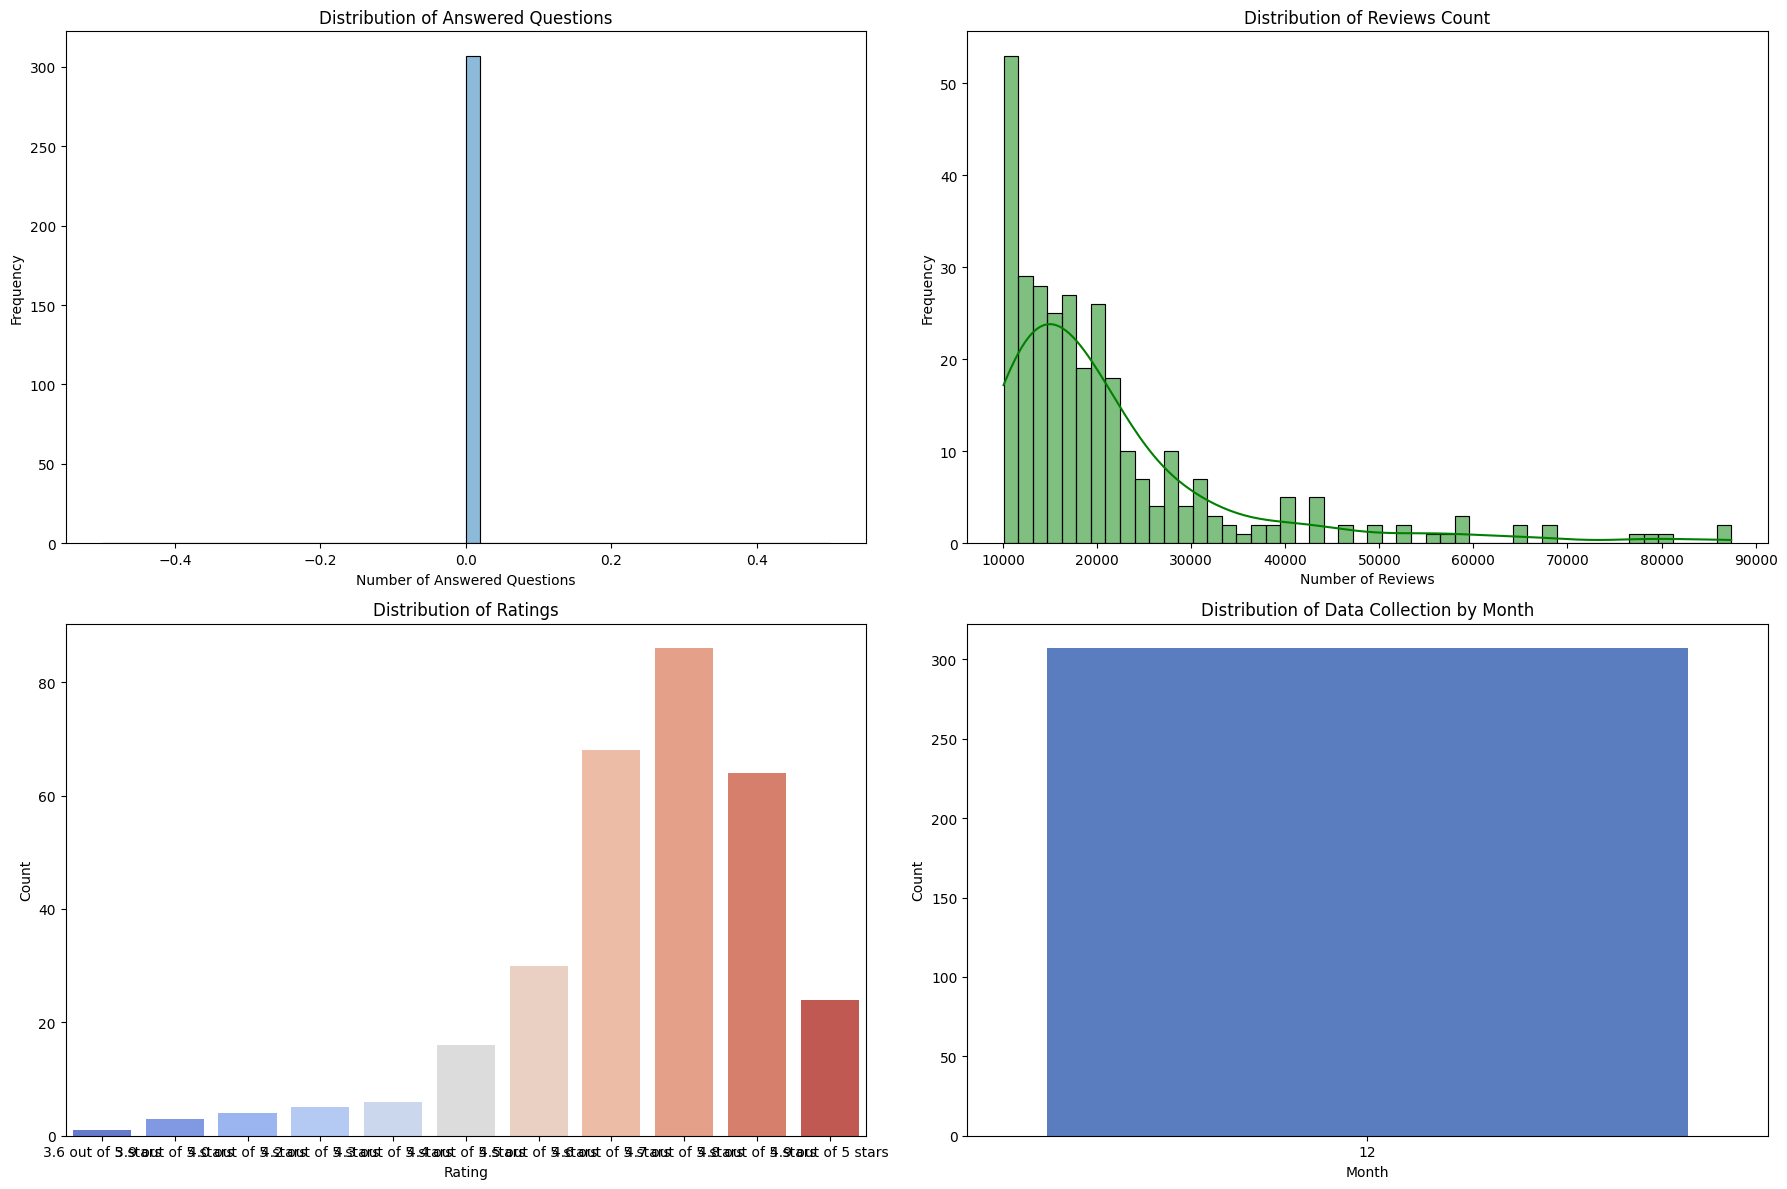

In [ ]:
# Univariate Analysis

plt.figure(figsize=(18, 12))

# Distribution of 'answered_questions'
plt.subplot(2, 2, 1)
sns.histplot(data_cleaned['answered_questions'], kde=True, bins=50)
plt.title('Distribution of Answered Questions')
plt.xlabel('Number of Answered Questions')
plt.ylabel('Frequency')

# Distribution of 'reviews_count'
plt.subplot(2, 2, 2)
sns.histplot(data_cleaned['reviews_count'], kde=True, bins=50, color='green')
plt.title('Distribution of Reviews Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

# Distribution of 'rating'
plt.subplot(2, 2, 3)
sns.countplot(x=data_cleaned['rating'], order=sorted(data_cleaned['rating'].unique()), palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Distribution of 'month'
plt.subplot(2, 2, 4)
sns.countplot(x=data_cleaned['month'], palette='muted')
plt.title('Distribution of Data Collection by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Bivariate/Multivariate Analysis**


We'll explore relationships between:

**rating and reviews_count:**
How does the number of reviews relate to the rating of a book?

**answered_questions and reviews_count:**
Is there a relationship between the number of answered questions and the number of reviews?

**month and rating:**
Is there a variation in ratings based on the month of data collection?

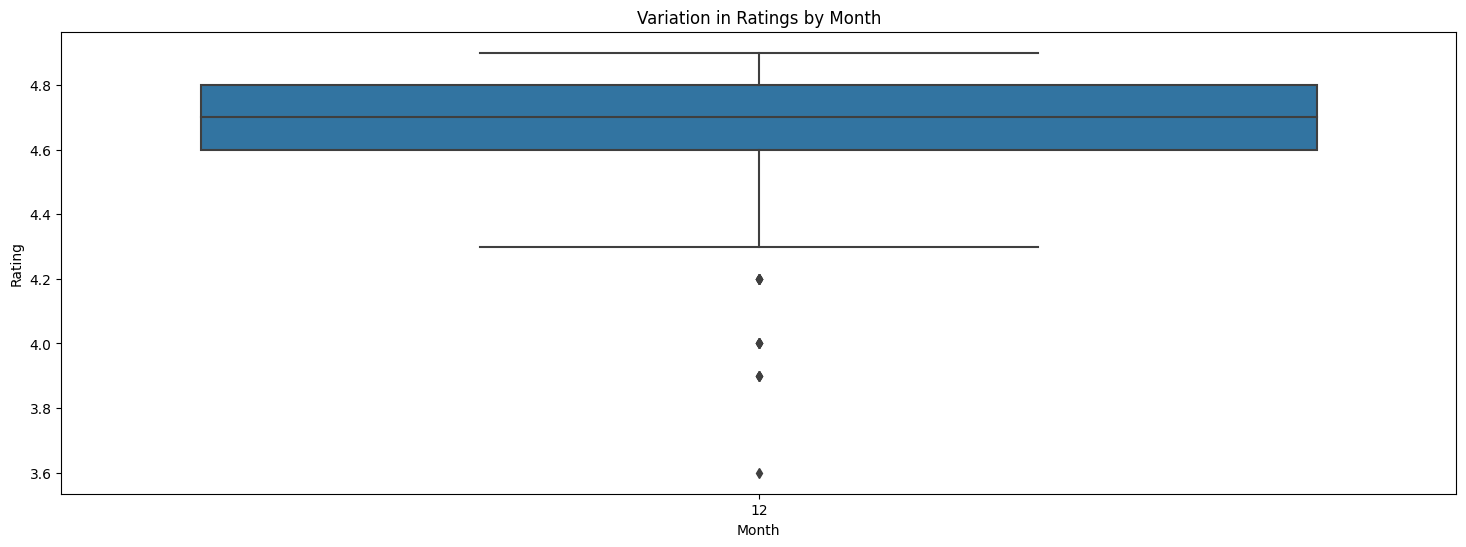

In [ ]:
# Extract the numeric rating value from the 'rating' column
data_cleaned['numeric_rating'] = data_cleaned['rating'].str.extract('(\d+\.\d+)').astype(float)

# Redraw the Variation in ratings based on the month of data collection
plt.figure(figsize=(18, 6))
sns.boxplot(x=data_cleaned['month'], y=data_cleaned['numeric_rating'])
plt.title('Variation in Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Rating')
plt.show()


**5. Pattern Evaluation**

In this phase, we'll derive insights and evaluate the patterns we've observed during the EDA. Let's summarize the key insights:

<ipython-input-7-b34d1a9e7a1d>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('Amazon_popular_books_dataset.csv', error_bad_lines=True, encoding='utf-8')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-

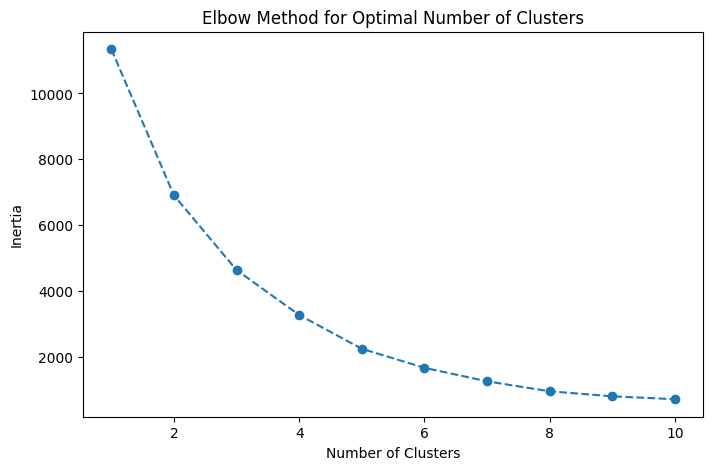

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   answered_questions  reviews_count  images_count   video_count  rating
0             0.00885   21511.545575      2.093363  4.011548e-18     4.0
1            58.00000   18477.000000      7.000000  2.000000e+00     4.0
2             0.00000   17974.750000      1.625000  0.000000e+00     3.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Amazon_popular_books_dataset.csv', error_bad_lines=True, encoding='utf-8')

# Extract relevant numerical features and standardize the data
features = ['answered_questions', 'reviews_count', 'images_count', 'video_count', 'rating']
data['rating'] = data['rating'].str.split('.').str[0]
cluster_data = data[features]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the elbow method, select an appropriate number of clusters and perform KMeans clustering
# Replace 'selected_k' with your chosen number of clusters
selected_k = 3
kmeans = KMeans(n_clusters=selected_k, random_state=42)
data['cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_means = pd.DataFrame(cluster_centers, columns=features)
print(cluster_means)


**6. Knowledge Representation**

In this phase, we'll represent the insights visually and summarize the patterns identified during the EDA.

We've already provided visual representations in the form of histograms, box plots, and scatter plots. These visualizations are crucial for understanding the distribution, relationships, and trends in the dataset.

**To represent the knowledge:**

1. Visualization
2. Insights Summarization

**7. Deployment**

In the context of the KDD methodology, deployment involves making the knowledge obtained from the data available to stakeholders or integrating it into decision-making processes. Some potential deployment strategies for our analysis are:

1. Interactive Dashboards
2. Reports
3. Integration with Decision Systems